In [2]:
using ModelingToolkit
using DifferentialEquations
using Random
using GLMakie
GLMakie.activate!(inline = true)

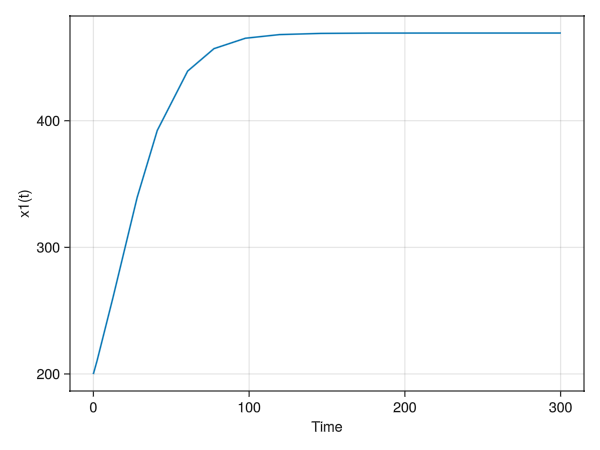

GLMakie.Screen(...)

In [4]:
iv = @variables t
states = @variables x1(t)
@variables y(t)
ps = @parameters α=0.0045 β=0.00015 s=10 N=600
D = Differential(t)

eqs = [
    D(x1) ~ (α + β * x1) * (N - x1) - s * x1 / (s + x1)
]
obs_eq = [y ~ x1]

@named model = ODESystem(eqs, t, states, ps, observed = obs_eq)

# 初期条件と時間範囲の設定
u0 = [x1 => 200.0]  # 初期条件
tspan = (0.0, 300.0)  # 時間範囲

# 微分方程式を解く
prob = ODEProblem(model, u0, tspan)
sol = solve(prob, Tsit5())

# 結果をプロット
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Time", ylabel="x1(t)")
lines!(ax, sol.t, sol[x1])
display(fig)
